In [200]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from nltk.translate import nist_score, bleu_score
from nltk.tokenize import word_tokenize
from nltk.translate import nist_score, bleu_score

In [58]:
# function to read lines from file to pandas data frame
def read_file(path):
    a = []
    index = 0
    with open(path) as f:
        prev_lines = []
        for line in f:
            prev_lines.append(line.strip('\n'))
            if index%5==0 and index!=0:
                a.append(prev_lines[0:5])
                del prev_lines[:]
                index = 0
            else:
                index += 1
    return pd.DataFrame(a, columns=['source','ref','candidate','bleu','label'])

# source https://stackoverflow.com/questions/51711750/read-relative-lines-in-a-text-document-and-convert-to-pandas-df

In [106]:
# read files and create train, dev and test sets
df = read_file('train.txt')
test = read_file('test.txt')

# replace the tet labels with numeric values
df.loc[df['label'] == 'H', 'label'] = 1
df.loc[df['label'] == 'M', 'label'] = 0
test.loc[test['label'] == 'H', 'label'] = 1
test.loc[test['label'] == 'M', 'label'] = 0
train, dev = np.split(df.sample(frac=1), [int(.7*len(df))])

In [141]:
test

,source,ref,candidate,bleu,label
0,"发言人 说 , 世人 共 知 , 中国 的 发展 不仅 符合 13 亿 中国人民 的 根本利...",the spokesman noted that it is known to all th...,"the spokesman said , the world , a total of 13...",0.5100,0
1,"在 国际 政治 舞台上 , 中国 是 一个 负责任 的 国家 , 对 维护 世界和平 与 稳...","in the international political arena , china i...","in the international political arena , china i...",0.5996,1
2,"在 核 不 扩散 问题 上 , 中国 始终 严格 履行 有关 国际公约 , 坚决 反对 任何...","on the issue of nuclear non-proliferation , ch...",on the issue of non-proliferation of nuclear w...,0.6667,1
3,"发言人 指出 , 令人 遗憾 的 是 , 海德 先生 无视 客观 事实 , 在 中美 关系 ...",the spokesman points out that it is regrettabl...,the spokesman stated that it was regretful tha...,0.5326,1
4,中国 最 大规模 的 海水 淡化 工程 落户 舟山,china's largest seawater desalination project ...,china's largest seawater desalination project ...,0.6014,1
...,...,...,...,...,...
168,"关 塔 那 摩 美国 海军基地 目前 关押 了 约 550 名 "" 基地 "" 组织 和 塔 ...","there are around 550 "" al-qaeda "" and taliban ...","currently , 550 suspected members of al-qaeda ...",0.4595,1
169,"美国 政府 称 这些 人 是 敌方 战斗 人员 , 不是 战俘 , 因而 不 受 "" 日内瓦...",the us government has declared these people as...,the us government claimed that they are advers...,0.4227,0
170,"许多 国家 批评 美国 政府 无限期 地 羁押 他们 的 公民 , 一些 国际组织 也 批评...",many countries have criticized the us governme...,many criticize the government of the indefinit...,0.6292,0
171,国家 域 名 顶 级 节点 落户 上海,national top-level node for domain names to se...,the national domain names top nodes in shanghai,0.4868,0


In [64]:
# Function to get F1-score

def calculate_f1(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr= tp/(tp + fn)
    fpr = fp/(fp + tn)
    fnr = 1 - tpr
    precision = tpr/(tpr+fpr)
    recall = tpr/(tpr+fnr)
    f1 = (2*precision*recall)/(precision + recall)
    return f1

In [81]:
# Create Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(train['bleu'].values.reshape(-1, 1), train['label'].values)

# calculate F1 score
model.predict(dev['bleu'].values.reshape(-1, 1))
calculate_f1(model.predict(dev['bleu'].values.reshape(-1, 1)), dev['label'].values)

0.001
0.6666666666666666
0.01
0.7133691364478874
0.1
0.7185635815958892
1.0
0.7064371899307894
1.1
0.710615488879305


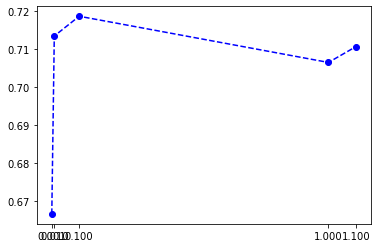

In [225]:
def getF1SVC(C):
    return calculate_f1(dev['label'].values.reshape(-1, 1).astype('int'),LinearSVC(C=C, max_iter=100000).fit(train['bleu'].values.reshape(-1, 1), train['label'].values.astype('int')).predict(dev['bleu'].values.reshape(-1, 1)))

cValues = np.array([0.001, 0.01, 0.1, 1.0,1.1])
F1SVC = np.zeros(0)
for C in cValues:
    print(C)
    valToApp = getF1SVC(C)
    F1SVC = np.append(F1SVC, valToApp)
    print(valToApp)

# Show plot of F1-scores as a function of C value
plt.xticks(cValues)
plt.plot(cValues, F1SVC, '--bo')

0.01
0.672340425531915
0.1
0.710615488879305
0.9
0.710615488879305
1.0
0.710615488879305
2.0
0.710615488879305
3.0
0.710615488879305
4.0
0.710615488879305
5.0
0.710615488879305
6.0
0.710615488879305
7.0
0.710615488879305
8.0
0.710615488879305
9.0
0.710615488879305
10.0
0.710615488879305


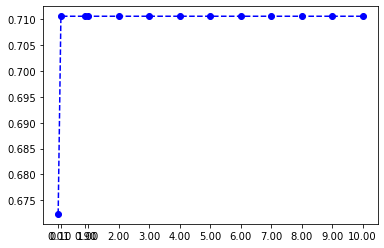

In [226]:
# Kernelized SVM
from sklearn.svm import SVC
def getF1SVCRBF(C):
    return calculate_f1(dev['label'].values.reshape(-1, 1).astype('int'),SVC(C=C, kernel='rbf').fit(train['bleu'].values.reshape(-1, 1), train['label'].values.astype('int')).predict(dev['bleu'].values.reshape(-1, 1)))

cValues = np.array([0.01,0.1,0.9,1,2,3,4,5,6,7,8,9,10])
F1SVCRBF = np.zeros(0)
for C in cValues:
    print(C)
    valToApp = getF1SVCRBF(C)
    F1SVCRBF = np.append(F1SVCRBF, valToApp)
    print(valToApp)

# Show plot of F1-scores as a function of C value
plt.xticks(cValues)
plt.plot(cValues, F1SVCRBF, '--bo')

In [227]:
# random forests
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=100, random_state=0)
clf1.fit(train['bleu'].values.reshape(-1, 1), train['label'].values.astype('int'))
print(calculate_f1(dev['label'].values.astype('int'),clf1.predict(dev['bleu'].values.reshape(-1, 1))))

0.6303953572723975


In [223]:
# Logistic regression prediction
from sklearn.linear_model import LogisticRegression
LogisticRegressionClf = LogisticRegression(random_state=0).fit(train['bleu'].values.reshape(-1, 1), train['label'].values.astype('int'))
print(calculate_f1(dev['label'].values.astype('int'),LogisticRegressionClf.predict(dev['bleu'].values.reshape(-1, 1))))

0.7105594531390538


In [228]:
def calculate_nist(row):
    ref = word_tokenize(row['ref'])
    candidate = word_tokenize(row['candidate'])
    return nist_score.sentence_nist([ref], candidate, n=4)

In [229]:
dev['nist'] = dev.apply(lambda row: calculate_nist(row), axis=1)
test['nist'] = test.apply(lambda row: calculate_nist(row), axis=1)
train['nist'] = train.apply(lambda row: calculate_nist(row), axis=1)

0.001
0.6648358949373256
0.01
0.7193223928004234
0.1
0.6770121598147075
1.0
0.6823640773827132
1.1
0.6823640773827132


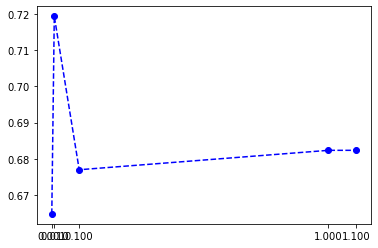

In [231]:
def getF1SVC(C):
    return calculate_f1(dev['label'].values.reshape(-1, 1).astype('int'),LinearSVC(C=C, max_iter=100000).fit(train['nist'].values.reshape(-1, 1), train['label'].values.astype('int')).predict(dev['nist'].values.reshape(-1, 1)))

cValues = np.array([0.001, 0.01, 0.1, 1.0,1.1])
F1SVC = np.zeros(0)
for C in cValues:
    print(C)
    valToApp = getF1SVC(C)
    F1SVC = np.append(F1SVC, valToApp)
    print(valToApp)

# Show plot of F1-scores as a function of C value
plt.xticks(cValues)
plt.plot(cValues, F1SVC, '--bo')


0.01
0.6666666666666666
0.1
0.6816552227015859
0.9
0.6777019271431161
1.0
0.6777019271431161
2.0
0.6777019271431161
3.0
0.6777019271431161
4.0
0.6816552227015859
5.0
0.6816552227015859
6.0
0.6816552227015859
7.0
0.6816552227015859
8.0
0.6816552227015859
9.0
0.6816552227015859
10.0
0.6816552227015859


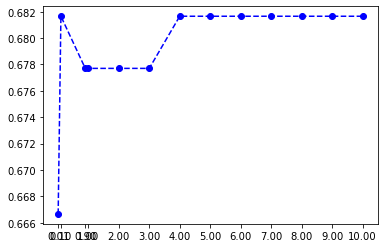

In [233]:
# Kernelized SVM
from sklearn.svm import SVC
def getF1SVCRBF(C):
    return calculate_f1(dev['label'].values.reshape(-1, 1).astype('int'),SVC(C=C, kernel='rbf').fit(train['nist'].values.reshape(-1, 1), train['label'].values.astype('int')).predict(dev['nist'].values.reshape(-1, 1)))

cValues = np.array([0.01,0.1,0.9,1,2,3,4,5,6,7,8,9,10])
F1SVCRBF = np.zeros(0)
for C in cValues:
    print(C)
    valToApp = getF1SVCRBF(C)
    F1SVCRBF = np.append(F1SVCRBF, valToApp)
    print(valToApp)

# Show plot of F1-scores as a function of C value
plt.xticks(cValues)
plt.plot(cValues, F1SVCRBF, '--bo')

In [234]:
# random forests
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=100, random_state=0)
clf1.fit(train['nist'].values.reshape(-1, 1), train['label'].values.astype('int'))
print(calculate_f1(dev['label'].values.astype('int'),clf1.predict(dev['nist'].values.reshape(-1, 1))))

0.5830258302583027


In [232]:
# Logistic regression prediction
from sklearn.linear_model import LogisticRegression
LogisticRegressionClf = LogisticRegression(random_state=0).fit(train['nist'].values.reshape(-1, 1), train['label'].values.astype('int'))
print(calculate_f1(dev['label'].values.astype('int'),LogisticRegressionClf.predict(dev['nist'].values.reshape(-1, 1))))

0.6761768901569187


0.001
0.6648358949373256
0.01
0.724656017713111
0.1
0.6884936992109293
1.0
0.7105594531390538
1.1
0.7105594531390538


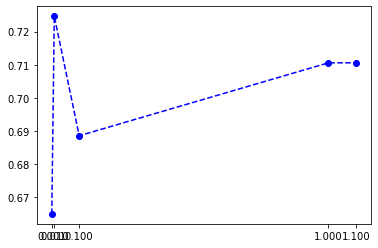

In [235]:
#########################  NIST + BLEU  ###############################

#SVM
def getF1SVC(C):
    return calculate_f1(dev['label'].values.reshape(-1, 1).astype('int'),LinearSVC(C=C, max_iter=100000).fit(np.array(train[['nist','bleu']]), train['label'].values.astype('int')).predict(np.array(dev[['nist','bleu']])))

cValues = np.array([0.001, 0.01, 0.1, 1.0,1.1])
F1SVC = np.zeros(0)
for C in cValues:
    print(C)
    valToApp = getF1SVC(C)
    F1SVC = np.append(F1SVC, valToApp)
    print(valToApp)

# Show plot of F1-scores as a function of C value
plt.xticks(cValues)
plt.plot(cValues, F1SVC, '--bo')

0.01
0.6666666666666666
0.1
0.6816552227015859
0.9
0.6768485751536599
1.0
0.6728383632660618
2.0
0.6850141376060321
3.0
0.6850141376060321
4.0
0.6915093159934975
5.0
0.6891712497629433
6.0
0.6915093159934975
7.0
0.6891712497629433
8.0
0.6891712497629433
9.0
0.6891712497629433
10.0
0.6891712497629433


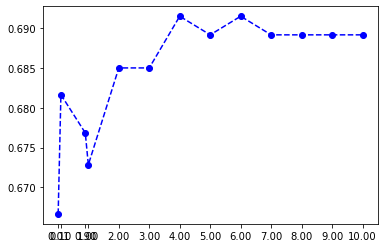

In [236]:
# Kernelized SVM
from sklearn.svm import SVC
def getF1SVCRBF(C):
    return calculate_f1(dev['label'].values.reshape(-1, 1).astype('int'),SVC(C=C, kernel='rbf').fit(np.array(train[['nist','bleu']]), train['label'].values.astype('int')).predict(np.array(dev[['nist','bleu']])))

cValues = np.array([0.01,0.1,0.9,1,2,3,4,5,6,7,8,9,10])
F1SVCRBF = np.zeros(0)
for C in cValues:
    print(C)
    valToApp = getF1SVCRBF(C)
    F1SVCRBF = np.append(F1SVCRBF, valToApp)
    print(valToApp)

# Show plot of F1-scores as a function of C value
plt.xticks(cValues)
plt.plot(cValues, F1SVCRBF, '--bo')

In [237]:
# random forests
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=100, random_state=0)
clf1.fit(np.array(train[['nist','bleu']]), train['label'].values.astype('int'))
print(calculate_f1(dev['label'].values.astype('int'),clf1.predict(np.array(dev[['nist','bleu']]))))

0.6597077244258872


In [238]:
# Logistic regression prediction
from sklearn.linear_model import LogisticRegression
LogisticRegressionClf = LogisticRegression(random_state=0).fit(np.array(train[['nist','bleu']]), train['label'].values.astype('int'))
print(calculate_f1(dev['label'].values.astype('int'),LogisticRegressionClf.predict(np.array(dev[['nist','bleu']]))))

0.6839826839826841


In [222]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(np.array(train[['nist','bleu']]), train['label'].values.astype('int'))
calculate_f1(test['label'].values.astype('int'), clf.predict(np.array(test[['nist','bleu']])))

0.7528441221475617

In [239]:
calculate_f1(test['label'].values.reshape(-1, 1).astype('int'),LinearSVC(C=0.01, max_iter=100000).fit(np.array(train[['nist','bleu']]), train['label'].values.astype('int')).predict(np.array(test[['nist','bleu']])))

0.7544999712461902